<a href="https://colab.research.google.com/github/BirukovAlex/neto_Python/blob/main/%D0%9F%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bit.ly/FEML-5-PROB

Конспект:
- One hot делает вектор {1,2,3}, labelEnc присваивает просто цифры (1,2,3). проблема OH если много категориальных переменных ()

# Влияние предобработки данных на модель

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
# Создаём сэмпл
n_samples = 1000

np.random.seed(9)
age_owner = np.random.choice(90, n_samples) + 21
length = np.random.choice(120, n_samples) + 15
width = np.random.choice(80, n_samples) + 10

price = length * width * 100 + 126

data = pd.DataFrame({
    'age_owner': age_owner,
    'length': length,
    'width': width,
    'price': price
})
data.head(5)

,age_owner,length,width,price
0,75,57,70,399126
1,77,39,60,234126
2,43,30,36,108126
3,86,30,68,204126
4,43,41,52,213326


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age_owner  1000 non-null   int64
 1   length     1000 non-null   int64
 2   width      1000 non-null   int64
 3   price      1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [4]:
data.describe()

,age_owner,length,width,price
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,65.461000,74.375000,50.207000,3.709868e+05
std,25.728981,33.975708,22.682342,2.480216e+05
min,21.000000,15.000000,10.000000,2.212600e+04
25%,43.000000,45.000000,30.000000,1.681010e+05
50%,65.000000,73.000000,51.000000,3.106260e+05
75%,88.000000,103.000000,69.000000,5.228010e+05
max,110.000000,134.000000,89.000000,1.139126e+06


In [5]:
data['length'].value_counts()

,count
length,
27,15
55,15
44,15
129,14
132,13
...,...
109,4
62,4
116,4


<Axes: ylabel='age_owner'>

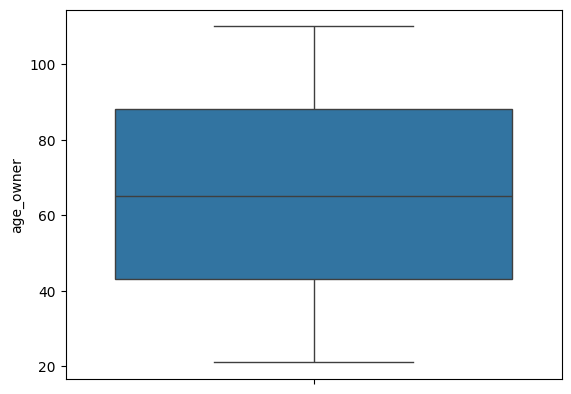

In [10]:
sns.boxplot(data.age_owner)

<Axes: >

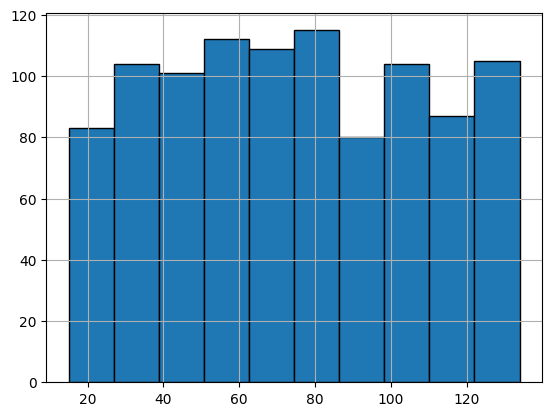

In [11]:
data['length'].hist(bins=10,edgecolor='black')

<Axes: >

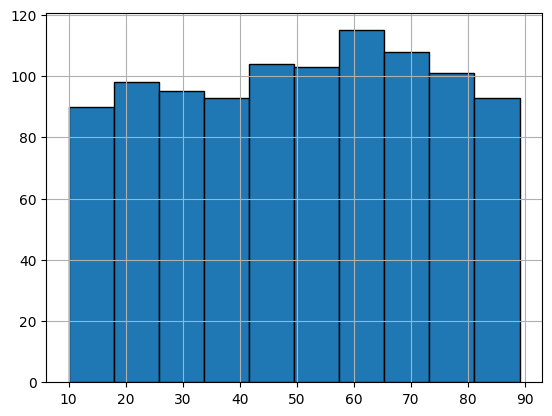

In [13]:
data['width'].hist(bins=10,edgecolor='black')

In [14]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.metrics import mean_absolute_error

X = data[['age_owner', 'length', 'width']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_test)
print('Error: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [-149.11046279 5071.76422338 7366.90372375]
Bias: -366334.87936744984
Error: 55721.7410666567


In [16]:
y.median(), y.mean(), y.std()

(310626.0, np.float64(370986.8), 248021.6003851643)

In [24]:
X = data[['length', 'width']]  # исключаем из обучения возраст продавца, как несвязанный. по-хорошему бы проверить линейную взаимосвязь сначала
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_test)
print('Error: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [5073.23397859 7365.79408501]
Bias: -376149.40078368207
Error: 58488.666752194724


In [19]:
#смотрим на корреляции
data.length.corr(data.width), data.age_owner.corr(data.width), data.age_owner.corr(data.length)

(np.float64(-0.03317100339949887),
 np.float64(0.006992287160952787),
 np.float64(-0.013233777518393155))

In [20]:
data.price.corr(data.width), data.price.corr(data.length), data.price.corr(data.age_owner)

(np.float64(0.6505718999853622),
 np.float64(0.672621743047383),
 np.float64(-0.019951732282835456))

In [21]:
# Создаем новый признак
data['area'] = data['length'] * data['width']
data.head(5)

,age_owner,length,width,price,area
0,75,57,70,399126,3990
1,77,39,60,234126,2340
2,43,30,36,108126,1080
3,86,30,68,204126,2040
4,43,41,52,213326,2132


In [25]:
X = data[['area', 'length', 'width']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X_test)
print('Error: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [1.00000000e+02 1.97572617e-13 3.11468006e-13]
Bias: 125.99999999988358
Error: 5.829497240483761e-11


In [26]:
# проверим корреляцию ещё раз
data.price.corr(data.width), data.price.corr(data.length), data.price.corr(data.area)

(np.float64(0.6505718999853622),
 np.float64(0.672621743047383),
 np.float64(0.9999999999999989))

In [28]:
from sklearn.preprocessing import PolynomialFeatures
# полиноминальные фичи (признаки), это пораные произведения всех признаков со всеми (декартово?)

poly = PolynomialFeatures(
    degree=3,
    # include_bias=False,
    # interaction_only=True
)
X = poly.fit_transform(data[['age_owner', 'length', 'width']])
y = data['price']

poly.get_feature_names_out()

array(['1', 'age_owner', 'length', 'width', 'age_owner^2',
       'age_owner length', 'age_owner width', 'length^2', 'length width',
       'width^2', 'age_owner^3', 'age_owner^2 length',
       'age_owner^2 width', 'age_owner length^2',
       'age_owner length width', 'age_owner width^2', 'length^3',
       'length^2 width', 'length width^2', 'width^3'], dtype=object)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
reg_poly = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg_poly.coef_))
print('Bias: {}'.format(reg_poly.intercept_))

pred_values = reg_poly.predict(X_test)
print('Error: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [ 0.00000000e+00  6.14660683e-11 -1.55469242e-11 -2.10382383e-11
 -1.37032635e-12  2.28100400e-13  4.72730834e-13  6.37808199e-14
  1.00000000e+02 -1.07228952e-14  8.56269318e-15 -3.93284917e-15
  4.75689292e-15  3.24661443e-15 -1.52490715e-15 -9.39103974e-15
 -3.24989748e-16 -2.86923263e-15  5.19462945e-15  2.34534614e-15]
Bias: 125.99999999895226
Error: 5.749752745032311e-10


# **Дополнительные материалы**
1. Типы данных https://youtu.be/c4Cg3TUIH0E
2. Метрика ROC-AUC https://youtu.be/v6PPG8J_Egs
3. Метрика F1-score https://youtu.be/PeE3Fkt5W3Q
4. Масштабирование данных (StandartScaler, MinMaxScaler) https://youtu.be/XsuCOfpf8Ic